In [1]:
# Start writing code here...
import abc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
# from fil import FIL_Logistic, FIL_Linear
from utils import *
import torch
import numpy as np
from fil_debug import FIL_Linear_lxy, FIL_Logistic_lxy
from numpy import linalg as LA

### Experiement 1: FIL distribution of OOD data

No handles with labels found to put in legend.


(-2.0, 2.0)

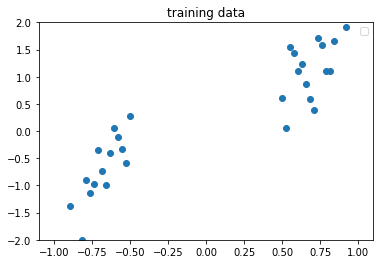

In [37]:
# generate random data for OOD exploration
def generate_data(number_of_points=10, noise_variance=0.3):
    '''Function for generating toy regression data'''
    #training x
    x_train = np.hstack((np.linspace(-1, -0.5, number_of_points), np.linspace(0.5, 1, number_of_points)))
    #function relating x and y
    f = lambda x: 3 * x**3
    #y is equal to f(x) plus gaussian noise
    y_train = f(x_train) + np.random.normal(0, noise_variance**0.5, 2 * number_of_points)
    x_test = np.array(list(set(list(np.hstack((np.linspace(-1, 1, 200), x_train))))))
    x_test = np.sort(x_test)
    
    return x_train, y_train, x_test

N = 20
noise_variance = 0.3
x_train, y_train, x_test = generate_data(number_of_points=N, noise_variance=noise_variance)
plt.scatter(x_train, y_train)#, label = "training data")
#plt.plot(x_test, y_test, 'orange', label = "MLE fitted polynomial regression")
plt.title("training data")
plt.legend()
plt.ylim(-2, 2)

THETA: tensor([2.0328])
fisher info loss: tensor([0.0532, 0.0531, 0.0562, 0.0759, 0.1039, 0.0639, 0.0508, 0.0661, 0.1039,
        0.0897, 0.0917, 0.1125, 0.0920, 0.0773, 0.0965, 0.1106, 0.0988, 0.0849,
        0.0696, 0.1007, 0.0644, 0.0917, 0.0381, 0.0465, 0.0633, 0.0633, 0.0820,
        0.0978, 0.1111, 0.0634, 0.0726, 0.0958, 0.1005, 0.0835, 0.0603, 0.0530,
        0.0877, 0.0606, 0.0546, 0.0774])


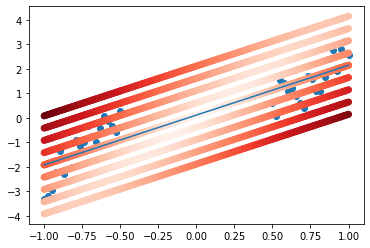

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
# Make an instance of the LinearRegression to perform regression
linear_model = LinearRegression(fit_intercept=False)
# Fit a polynomial model
x_train_poly = poly.fit_transform(x_train.reshape((-1, 1)))
linear_model.fit(x_train_poly, y_train)
x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))
y_test = linear_model.predict(x_test_poly)

# construct model for FIL
data = {"features": torch.from_numpy(x_train.reshape(-1, 1)).float(), "targets": torch.from_numpy(y_train).float()}
model = FIL_Linear_lxy()
model.train(data)

print('fisher info loss:', model.compute_all_fils())

dis_lst = [0, 0.5, 1, 1.5, 2]
plt.scatter(x_train, y_train)#, label = "training data")
plt.plot(x_test, y_test)
y_total = []
fil = []
for dis in dis_lst:
    y_new_low = y_test - dis
    y_new_upp = y_test + dis
    y_total = np.hstack((y_total, y_new_low))
    y_total = np.hstack((y_total, y_new_upp))
    fil_low = model.fil(torch.from_numpy(x_test.reshape(-1, 1)).float(),torch.tensor(y_new_low).float())
    fil_upp = model.fil(torch.from_numpy(x_test.reshape(-1, 1)).float(),torch.tensor(y_new_upp).float())
    fil += fil_low
    fil += fil_upp
plt.scatter([x_test]*2*len(dis_lst), y_total, c = fil, cmap = 'Reds')
#plt.scatter(x_test, y_new_upp, c = fil_low, cmap = 'Reds')
plt.show()


Text(0.5, 1.0, 'Heatmap of FIL based on linear model of training data')

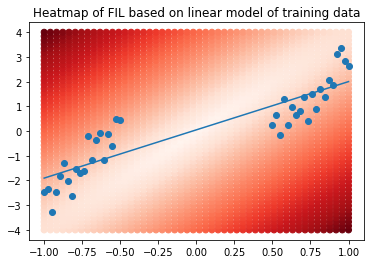

In [ ]:
x_range = np.linspace(-1, 1, 50)
y_range = np.linspace(-4, 4, 50)
fil_lst = []
y_final = []
x_final = []
#for x in x_range:
for y in y_range:
    fil_lst += model.fil(torch.from_numpy(x_range.reshape(-1, 1)).float(), torch.tensor(y).float())
    y_final += [y]*len(x_range)
    x_final += [x for x in x_range]
plt.scatter(x_final, y_final, c = fil_lst, cmap = 'Reds')
plt.scatter(x_train, y_train)#, label = "training data")
plt.plot(x_test, y_test)
plt.title('Heatmap of FIL based on linear model of training data')

No handles with labels found to put in legend.


(-2.0, 2.0)

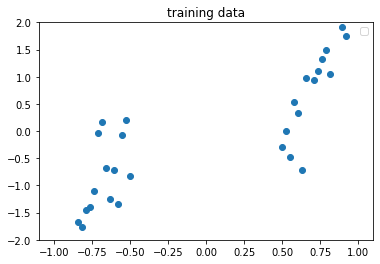

In [39]:
def generate_data(number_of_points=10, noise_variance=0.3):
    '''Function for generating toy regression data'''
    #training x
    x_train = np.hstack((np.linspace(-1, -0.5, number_of_points), np.linspace(0.5, 1, number_of_points)))
    #function relating x and y
    f = lambda x: 3 * x**3
    #y is equal to f(x) plus gaussian noise
    y_train = f(x_train) + np.random.normal(0, noise_variance**0.5, 2 * number_of_points)
    x_test = np.array(list(set(list(np.hstack((np.linspace(-1, 1, 200), x_train))))))
    x_test = np.sort(x_test)
    
    return x_train, y_train, x_test

N = 20
noise_variance = 0.3
x_train, y_train, x_test = generate_data(number_of_points=N, noise_variance=noise_variance)
plt.scatter(x_train, y_train)#, label = "training data")
#plt.plot(x_test, y_test, 'orange', label = "MLE fitted polynomial regression")
plt.title("training data")
plt.legend()
plt.ylim(-2, 2)

THETA: tensor([1.9910])
fisher info loss: tensor([0.0639, 0.0691, 0.0451, 0.0746, 0.0673, 0.0376, 0.0800, 0.0722, 0.0795,
        0.0770, 0.0845, 0.1232, 0.1270, 0.0876, 0.0602, 0.0772, 0.0480, 0.0942,
        0.1008, 0.0544, 0.0999, 0.0923, 0.1168, 0.0795, 0.0924, 0.1403, 0.0754,
        0.0297, 0.0866, 0.0845, 0.0803, 0.0779, 0.1004, 0.0521, 0.0528, 0.0801,
        0.0909, 0.0817, 0.0489, 0.0583])


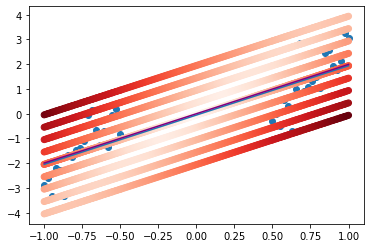

In [40]:
## did some check


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
# Make an instance of the LinearRegression to perform regression
linear_model = LinearRegression(fit_intercept=False)
# Fit a polynomial model
x_train_poly = poly.fit_transform(x_train.reshape((-1, 1)))
linear_model.fit(x_train_poly, y_train)
x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))
y_test = linear_model.predict(x_test_poly)

data = {"features": torch.from_numpy(x_train.reshape(-1, 1)).float(), "targets": torch.from_numpy(y_train).float()}
model = FIL_Linear_lxy()
model.train(data)

# print("coefficients:{}".format(model.get_params()))

#J = model.jacobian_dataset(data)
print('fisher info loss:', model.compute_all_fils())

dis_lst = [0, 0.5, 1, 1.5, 2]
plt.scatter(x_train, y_train)#, label = "training data")
plt.plot(x_test, y_test)

plt.plot(x_train, model.predict(torch.from_numpy(x_train.reshape(-1, 1)).float(), regression=True), label="linear regression", color="purple")

y_total = []
fil = []
for dis in dis_lst:
    y_new_low = y_test - dis
    y_new_upp = y_test + dis
    y_total = np.hstack((y_total, y_new_low))
    y_total = np.hstack((y_total, y_new_upp))
    fil_low = model.fil(torch.from_numpy(x_test.reshape(-1, 1)).float(),torch.tensor(y_new_low).float())
    fil_upp = model.fil(torch.from_numpy(x_test.reshape(-1, 1)).float(),torch.tensor(y_new_upp).float())
    fil += fil_low
    fil += fil_upp
plt.scatter([x_test]*2*len(dis_lst), y_total, c = fil, cmap = 'Reds')
#plt.scatter(x_test, y_new_upp, c = fil_low, cmap = 'Reds')
plt.show()





In [41]:
x_train_poly

array([[ 1.        , -1.        ],
       [ 1.        , -0.97368421],
       [ 1.        , -0.94736842],
       [ 1.        , -0.92105263],
       [ 1.        , -0.89473684],
       [ 1.        , -0.86842105],
       [ 1.        , -0.84210526],
       [ 1.        , -0.81578947],
       [ 1.        , -0.78947368],
       [ 1.        , -0.76315789],
       [ 1.        , -0.73684211],
       [ 1.        , -0.71052632],
       [ 1.        , -0.68421053],
       [ 1.        , -0.65789474],
       [ 1.        , -0.63157895],
       [ 1.        , -0.60526316],
       [ 1.        , -0.57894737],
       [ 1.        , -0.55263158],
       [ 1.        , -0.52631579],
       [ 1.        , -0.5       ],
       [ 1.        ,  0.5       ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  0.55263158],
       [ 1.        ,  0.57894737],
       [ 1.        ,  0.60526316],
       [ 1.        ,  0.63157895],
       [ 1.        ,  0.65789474],
       [ 1.        ,  0.68421053],
       [ 1.        ,

### Experiment 2: Overfitting Probe with FIL based on Polynomial Regression

THETA: tensor([0.0500, 1.9526])
THETA: tensor([ 0.1363,  1.9526, -0.1474])
THETA: tensor([ 0.1363, -0.4480, -0.1474,  3.5579])
THETA: tensor([ 1.1490, -0.4480, -3.9955,  3.5579,  3.1398])
THETA: tensor([ 1.1490, -1.6165, -3.9954,  7.6343,  3.1398, -3.1362])
THETA: tensor([ 1.8090, -1.6166, -7.8719,  7.6345,  9.9598, -3.1364, -3.6725])
THETA: tensor([ 1.8092, -0.2028, -7.8731, -0.2416,  9.9618, 10.1010, -3.6736, -6.8692])
THETA: tensor([ -2.5215,  -0.2058,  26.4150,  -0.2248, -84.1087,  10.0729, 103.3241,
         -6.8547, -43.0209])
THETA: tensor([  -2.5696,  -11.5689,   26.7947,   86.5217,  -85.1465, -219.8046,
         104.5000,  246.6853,  -43.4920,  -99.2699])
THETA: tensor([   2.0764,  -11.5051,  -18.7359,   86.0480,   82.6440, -218.5843,
        -187.7479,  245.3748,  198.6315,  -98.7691,  -76.8109])
THETA: tensor([   1.6435,   -8.3908,  -14.4914,   57.5863,   66.9942, -121.0943,
        -160.4765,   87.4968,  176.0271,   23.1462,  -69.6369,  -36.1774])
THETA: tensor([  -9.2101, 

Text(0.5, 1.0, 'Relationship between degree of polynomial and FIL')

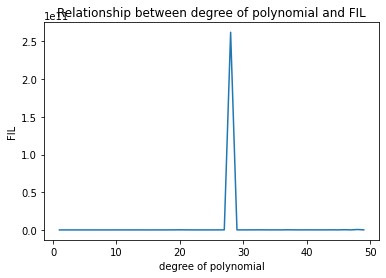

In [ ]:

D = range(1, 50)
res = []
for d in D:
    d = int(d)
    poly = PolynomialFeatures(d)
    # Make an instance of the LinearRegression to perform regression
    linear_model = LinearRegression(fit_intercept=False)
    # Fit a polynomial model
    x_train_poly = poly.fit_transform(x_train.reshape((-1, 1)))
    linear_model.fit(x_train_poly, y_train)
    #x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))
    #y_test = linear_model.predict(x_test_poly)

    data = {"features": torch.from_numpy(x_train_poly.reshape(-1, d+1)).float(), "targets": torch.from_numpy(y_train).float()}
    model = FIL_Linear_lxy()
    model.train(data)
    fil = model.compute_all_fils()
    #print('fisher info loss:', fil) 
    #plt.scatter(x_train, y_train, c = fil, cmap = 'Greens')
    res.append(LA.norm(np.array(fil)))

plt.plot(D, res)
plt.xlabel('degree of polynomial')
plt.ylabel('FIL')
plt.title('Relationship between degree of polynomial and FIL')
# print("coefficients:{}".format(model.get_params()))

#J = model.jacobian_dataset(data)


### Experiment 3: FIL as indicator of OOD

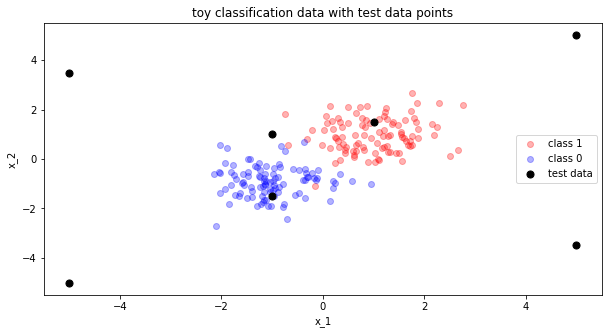

In [ ]:
samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x = np.vstack((class_0, class_1))
y = np.array([0] * 100 + [1] * 100)

test_points = [(-5, -5), (-5, 3.5), (5, 5), (5, -3.5), (-1, 1), (-1, -1.5), (1, 1.5)]


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.3, color='red', label='class 1')
ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.3, color='blue', label='class 0')
for i in range(len(test_points)):
    pt = test_points[i]
    if i == 0:
        ax.scatter(pt[0], pt[1], alpha=1., s=50, color='black', label='test data')
    else:
        ax.scatter(pt[0], pt[1], alpha=1., s=50, color='black')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')
plt.show()


fisher info loss: tensor([3.1085, 2.0450, 0.9240, 2.5158, 2.8666, 2.2239, 2.4752, 2.4718, 0.6041,
        3.8073, 2.6151, 0.8527, 3.2542, 4.3363, 3.0893, 1.2351, 3.9730, 0.6524,
        1.2201, 3.4594, 4.6461, 1.5281, 4.0222, 2.3505, 1.2351, 2.8207, 2.8905,
        0.9230, 0.9605, 3.4465, 2.0931, 1.0991, 2.5284, 3.8423, 3.0085, 2.7601,
        1.4768, 1.7661, 3.8111, 3.5337, 3.6064, 2.5128, 3.6492, 1.9508, 3.7897,
        0.9579, 2.8272, 0.9390, 3.0616, 1.8714, 3.6708, 4.0486, 3.3415, 1.9592,
        3.1994, 3.7245, 2.2674, 2.2668, 2.7673, 2.9683, 1.6948, 3.3089, 1.1618,
        3.3677, 2.6274, 1.1379, 2.3567, 1.5656, 3.6862, 2.2127, 1.7526, 3.3680,
        3.3090, 2.7677, 2.1636, 2.6350, 2.1586, 2.4601, 1.1337, 2.8954, 2.0487,
        2.2613, 3.3187, 3.6099, 3.2388, 3.9947, 2.7495, 1.4126, 3.4428, 2.4753,
        2.5577, 2.6987, 2.0426, 3.1838, 2.1625, 1.2721, 1.2953, 5.9859, 0.8646,
        2.3701, 3.1940, 2.0430, 2.6007, 1.1769, 0.4480, 3.1832, 2.9833, 2.6570,
        1.6842, 3.8827

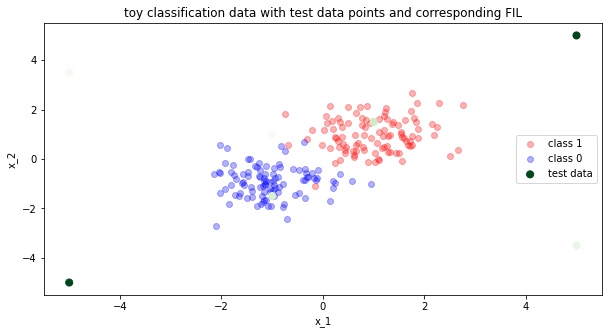

In [ ]:
data = {"features": torch.from_numpy(x.reshape(-1, 2)).float(), "targets": torch.from_numpy(y).float()}
model = FIL_Logistic_lxy()
model.train(data)
print('fisher info loss:', model.compute_all_fils())

#x_test = []
#y_test = []
#for x_, y_ in test_points:
   # x_test.append([x_])
   # y_test.append(y_)
#x_test = np.array(x_test)
#y_test = np.array(y_test)
y_test = [0]*len(test_points)
fil = model.fil(torch.tensor(test_points).float(),torch.tensor(y_test).float()).detach().numpy()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.3, color='red', label='class 1')
ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.3, color='blue', label='class 0')
#for i in range(len(test_points)):
#    pt = test_points[i]
#    if i == 0:
ax.scatter([x[0] for x in test_points], [x[1] for x in test_points], alpha=1., s=50, c=fil, cmap = 'Greens', label='test data')
#    else:
#        ax.scatter(pt[0], pt[1], alpha=1., s=50, color=fil[i])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points and corresponding FIL')
ax.legend(loc='best')
plt.show()


In [ ]:
len(data["features"])

200

In [ ]:
fil

array([1581.5974 ,  172.93019, 1597.371  ,  284.3881 ,  135.8219 ,
        399.1963 ,  457.75504], dtype=float32)

### Experiment 5: OOD indicator of MNIST

In [19]:
import torchvision.datasets as datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=False, transform=None)

features, targets = mnist_trainset.data, mnist_trainset.targets

features = features.float().div_(255.)
features = features.reshape(features.size(0), -1)


# only choose 0,1
num_classes = 2

mask = targets.lt(num_classes)
x_train = features[mask, :]
y_train = targets[mask]

# x_train, mapping = pca(x_train, num_dims=20)

x_train.div_(x_train.norm(dim=1).max())
# y_train[y_train == 0] = -1
y_train = y_train.float()

# num_samples = 12665
# data = {"features": x_train[:num_samples], "targets": y_train[:num_samples]}
data = {"features": x_train, "targets": y_train}

data, mapping = pca(data, num_dims=20)
model = FIL_Logistic_lxy()
model.train(data, l2=8e-4)


In [8]:
x_train.shape

torch.Size([12665, 784])

In [20]:
fil_set = model.compute_all_fils()
print('mean of train data FIL: ', fil_set.mean().item())
print('norm of train data FIL matrix: ', LA.norm(fil_set.detach().numpy()))

mean of train data FIL:  0.0267013069242239
norm of train data FIL matrix:  3.3152442


In [21]:
fil_set

tensor([0.0207, 0.0195, 0.0221,  ..., 0.0313, 0.0356, 0.0208],
       grad_fn=<CopyBackwards>)

In [22]:
mask = targets.lt(5)
features = features[mask, :]
targets = targets[mask]
num_samples = 100
for i in range(2, 5):
    x_test = features[targets == i][:num_samples].detach()
    y_test = targets[targets == i][:num_samples].detach()
    fil_set = model.fil(x_test, y_test)
    print(f'target = {i}, the mean of FIL is: ', fil_set.mean().item())
    print(f'target = {i}, the norm of FIL matrix is ', LA.norm(fil_set))

RuntimeError: size mismatch, got 100, 100x784,20

In [ ]:
'''
num_samples = 100
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]
D = range(1, 5)
res = []
for d in D:
    print(d)
    d = int(d)
    poly = PolynomialFeatures(d)
    # Make an instance of the LinearRegression to perform regression
    linear_model = LinearRegression(fit_intercept=False)
    # Fit a polynomial model
    x_train_poly = poly.fit_transform(x_train)
    linear_model.fit(x_train_poly, y_train)
    #x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))
    #y_test = linear_model.predict(x_test_poly)

    data = {"features": torch.from_numpy(x_train_poly).float(), "targets": y_train}
    model = FIL_Linear_lxy()
    model.train(data)
    fil = model.compute_all_fils()
    #print('fisher info loss:', fil) 
    #plt.scatter(x_train, y_train, c = fil, cmap = 'Greens')
    res.append(LA.norm(np.array(fil)))

plt.plot(D, res)
plt.xlabel('degree of polynomial')
plt.ylabel('FIL')
plt.title('Relationship between degree of polynomial and FIL')
# print("coefficients:{}".format(model.get_params()))

#J = model.jacobian_dataset(data)
'''

1
2


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
x_train.shape

torch.Size([100, 874])

In [ ]:
import torchvision.datasets as datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=False, transform=None)

features, targets = mnist_trainset.data, mnist_trainset.targets

features = features.float().div_(255.)
features = features.reshape(features.size(0), -1)


# only choose 0,1
num_classes = 2

mask = targets.lt(num_classes)
features = features[mask, :]
targets = targets[mask]

features.div_(features.norm(dim=1).max())
targets[targets == 0] = -1
targets = targets.float()

In [ ]:
i = 0
model = FIL_Logistic_lxy()
model.train(data, l2=i)

In [ ]:
#from fil import FIL_Logistic, FIL_Linear
from torch.distributions import normal
from sklearn.linear_model import LogisticRegression, LinearRegression

m = normal.Normal(0, 1)

num_samples = 100
train_features = features[:num_samples].numpy()
y_train = targets[:num_samples]


test_features = features[100:150].numpy()
print(test_features.shape)
y_test = targets[100:150].numpy()

l2_lst = [0, 1, 0.1, 1e-2, 1e-3, 13-4, 1e-5]
for i in l2_lst:
    #noise = m.sample((num_samples,10*i))
    #noise = train_features
    x_train = train_features
    print(type(add_bias(x_train)))
    data = {"features": torch.from_numpy(add_bias(x_train)).float(), "targets": y_train}
    if i > 0:
        clf = LogisticRegression(C = 1/i).fit(x_train, y_train)
    else:
        clf = LogisticRegression().fit(x_train, y_train)
    #x_test = np.hstack((test_features, np.zeros((test_features.shape[0], 10*i))))
    x_test = test_features
    score = clf.score(x_test, y_test)
    print(score)
    model = FIL_Logistic_lxy()
    model.train(data, l2=i)


    # print("coefficients:{}".format(model.get_params()))

    all_fils =  model.compute_all_fils()
    print(LA.norm(np.array(all_fils)))
    #print('fisher info loss:', all_fils)


(50, 784)
<class 'numpy.ndarray'>
1.0


RuntimeError: svd_cpu: (Batch element 0): The algorithm failed to converge because the input matrix is ill-conditioned or has too many repeated singular values (error code: 23).

In [ ]:
from torch.distributions import normal
from sklearn.linear_model import LogisticRegression, LinearRegression

m = normal.Normal(0, 1)

num_samples = 100
train_features = features[:num_samples]
y_train = targets[:num_samples]


test_features = features[100:150].numpy()
print(test_features.shape)
y_test = targets[100:150].numpy()

for i in range(10):
    #noise = m.sample((num_samples,10*i))
    noise = train_features[:, :10*i]**2
    x_train = torch.cat((train_features, noise), dim = 1)
    data = {"features": x_train, "targets": y_train}
    clf = LogisticRegression().fit(x_train, y_train)
    x_test = np.hstack((test_features, np.zeros((test_features.shape[0], 10*i))))
    score = clf.score(x_test, y_test)
    print(score)
    model = FIL_Linear_lxy()

    model.train(data)


    # print("coefficients:{}".format(model.get_params()))

    all_fils =  model.compute_all_fils()
    print(LA.norm(np.array(all_fils)))
    #print('fisher info loss:', all_fils)


(50, 784)
torch.Size([100, 784])
(50, 784)
1.0
/work/fil_debug.py:100: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  theta = torch.solve(b[:, None], XTX)[0].squeeze(1)
0.10309663
torch.Size([100, 794])
(50, 784)
1.0
0.10309663
torch.Size([100, 804])
(50, 784)
1.0
0.10309663
torch.Size([100, 814])
(50, 784)
1.0
0.10309663
torch.Size([100, 824])
(50, 784)
1.0
0.10309663
torch.Size([100, 834])
(50, 784)
1.0
0.10309663
torch.Size([100, 844])
(50, 784)
1.0
0.10309663
torch.Size([100, 854])
(50, 784)
1.0
0.10309663
torch.Size([100, 864])
(50, 784)
1.0
0.10309663
torch.Size([

In [ ]:
 noise.shape

torch.Size([100])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3414c8e1-e8f2-444e-be94-05f51d01b06b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>